# 911 Calls Capstone Project

The capstone project consists in an analysis of the 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). 

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

In [2]:
# Import visualization libs
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('dark')
%matplotlib inline

In [3]:
# Read data
df = pd.read_csv('911.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Analysis

In [5]:
# Top 5 zip codes for 911 calls
df['zip'].value_counts().head(5)
df['zip'].value_counts


<bound method IndexOpsMixin.value_counts of 0        19525.0
1        19446.0
2        19401.0
3        19401.0
4            NaN
          ...   
99487    19401.0
99488    19003.0
99489    19401.0
99490    19002.0
99491    19446.0
Name: zip, Length: 99492, dtype: float64>

In [6]:
# Top 5 townships (twp) for 911 calls 
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [7]:
# Unique title codes
df['title'].nunique()

110

## Add Reason feauture

In [8]:
# Split 'reason' from title
df['reason']=df['title'].apply(lambda title: title.split(':')[0])
df[['title', 'reason']]

,title,reason
0,EMS: BACK PAINS/INJURY,EMS
1,EMS: DIABETIC EMERGENCY,EMS
2,Fire: GAS-ODOR/LEAK,Fire
3,EMS: CARDIAC EMERGENCY,EMS
4,EMS: DIZZINESS,EMS
...,...,...
99487,Traffic: VEHICLE ACCIDENT -,Traffic
99488,Traffic: VEHICLE ACCIDENT -,Traffic
99489,EMS: FALL VICTIM,EMS
99490,EMS: NAUSEA/VOMITING,EMS


In [9]:
# Most common Reason for a 911 call
df['reason'].value_counts().head(1)


EMS    48877
Name: reason, dtype: int64

Text(0, 0.5, 'Total')

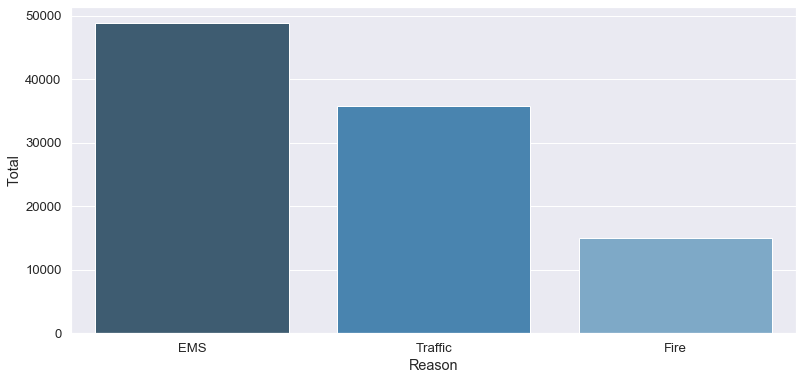

In [10]:
# seaborn count plot - reason by number of calls
plt.figure(figsize=(13,6))
sns.set(font_scale=1.2) 
ax = sns.countplot(x='reason', data=df, palette='Blues_d', order = df['reason'].value_counts().index)
ax.set_xlabel('Reason')
ax.set_ylabel('Total')

## Timestamp analysis

In [11]:
# timeStamp column - String
type(df['timeStamp'][0])

str

In [12]:
# Convert to datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [13]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
# Create hour, month, day of the week columns
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df[['timeStamp', 'month', 'day of week', 'hour']].head(3)

,timeStamp,month,day of week,hour
0,2015-12-10 17:40:00,12,3,17
1,2015-12-10 17:40:00,12,3,17
2,2015-12-10 17:40:00,12,3,17


In [15]:
# Map days of the week with week day names
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dmonth = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Out',11:'Nov',12:'Dec'}
df['day of week'] = df['day of week'].map(dmap)
df['month name'] = df['month'].map(dmonth)
df[['timeStamp', 'month', 'day of week', 'hour']].head(3)

,timeStamp,month,day of week,hour
0,2015-12-10 17:40:00,12,Thu,17
1,2015-12-10 17:40:00,12,Thu,17
2,2015-12-10 17:40:00,12,Thu,17


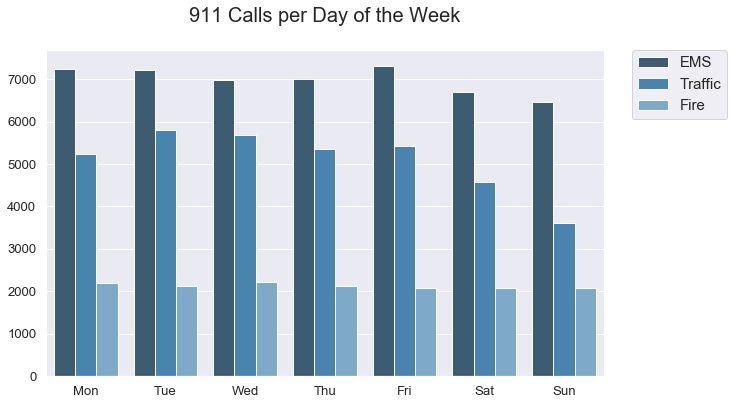

In [16]:
# Plot  calls per day of week
plt.figure(figsize=(10,6))
axdw = sns.countplot(x='day of week', data=df, hue='reason', palette='Blues_d', hue_order=['EMS', 'Traffic', 'Fire'],
                    order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
axdw.set_xlabel('')
axdw.set_ylabel('')
axdw.set_title('911 Calls per Day of the Week\n', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)

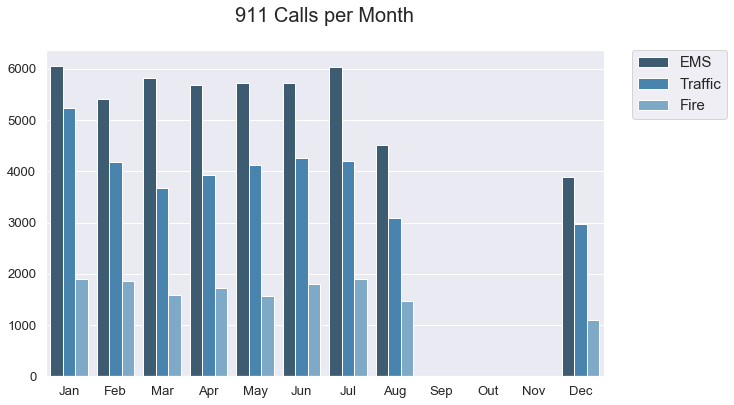

In [17]:
# Plot  calls per month
plt.figure(figsize=(10,6))
axdw = sns.countplot(x='month name', data=df, hue='reason', palette='Blues_d', hue_order=['EMS', 'Traffic', 'Fire'],
                    order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Out','Nov','Dec'])
axdw.set_xlabel('')
axdw.set_ylabel('')
axdw.set_title('911 Calls per Month\n', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)

In [18]:
# Count total calls by month
df['month'].value_counts()

1     13205
7     12137
6     11786
2     11467
5     11423
4     11326
3     11101
8      9078
12     7969
Name: month, dtype: int64

In [19]:
# Create byMonth groupby object
byMonth = df.groupby('month').count()
byMonth.head(3)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week,month name
month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101


Text(0.5, 1.0, 'Calls by Month')

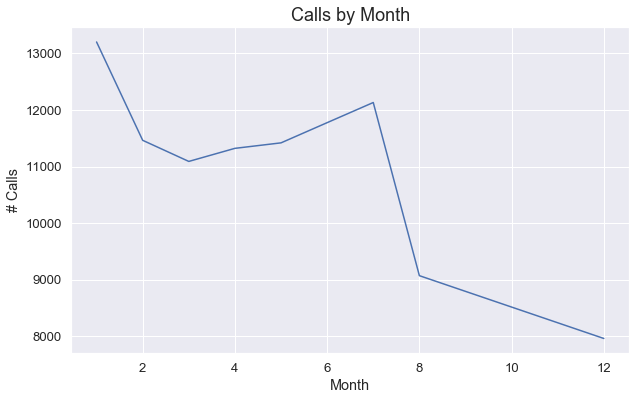

In [20]:
# Plot total cals by month
plt.figure(figsize=(10,6))
axm = sns.lineplot(x=byMonth.index, y='twp', data=byMonth)
axm.set_xlabel('Month')
axm.set_ylabel('# Calls')
axm.set_title('Calls by Month', fontsize=18)

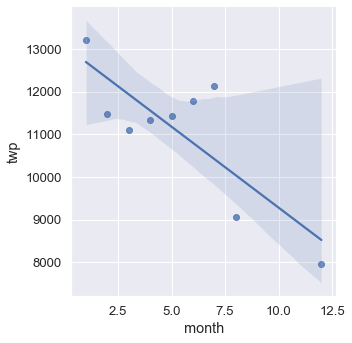

In [22]:
# linear fit on the number of calls per month
byMonth.reset_index(inplace=True)
sns.lmplot(x='month', y='twp', data=byMonth)

In [23]:
# Extract date from timestamp
df['date']=df['timeStamp'].apply(lambda t: t.date())
byDate = df.groupby('date').count()

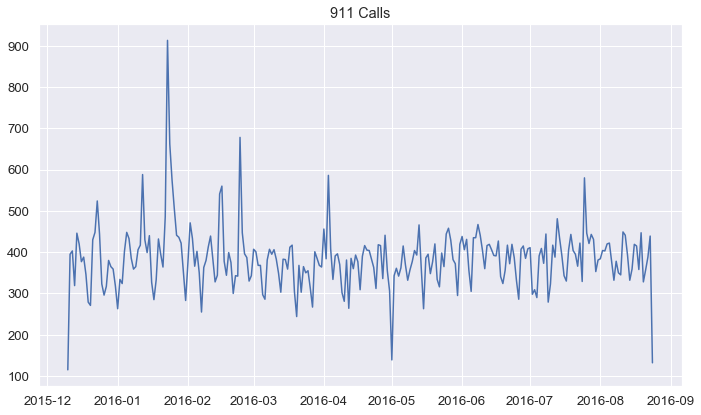

In [24]:
plt.figure(figsize=(10,6))
ax = df.groupby('date').count()['twp'].plot(title='911 Calls')
ax.set_xlabel('')
plt.tight_layout()

Text(0.5, 1.0, 'EMS')

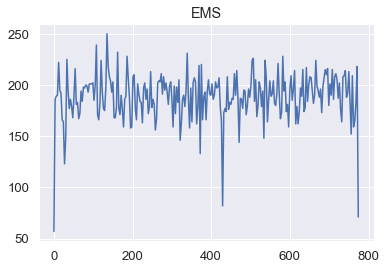

In [25]:
dfR = df.groupby(['date','reason']).count()
dfR.reset_index(inplace=True)

plot = dfR[dfR['reason']=='EMS']['lat'].plot()
plot.set_title('EMS')

Text(0.5, 1.0, 'Traffic')

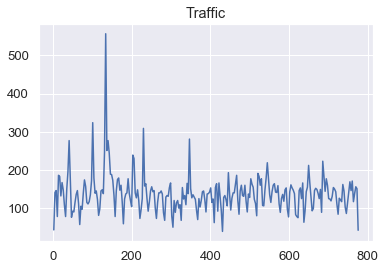

In [26]:
plot = dfR[dfR['reason']=='Traffic']['lat'].plot()
plot.set_title('Traffic')

Text(0.5, 1.0, 'Fire')

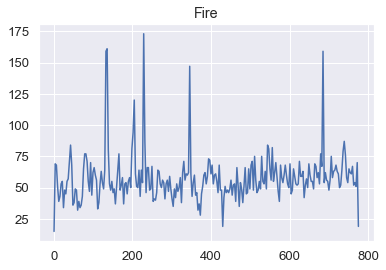

In [27]:
plot = dfR[dfR['reason']=='Fire']['lat'].plot()
plot.set_title('Fire')

## Matrix analysis

In [73]:
# Analysis by hour/day of week
df2 = df.groupby(['hour', 'day of week']).count()['twp'].unstack(level=0)
df2

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
Tue,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
Wed,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334


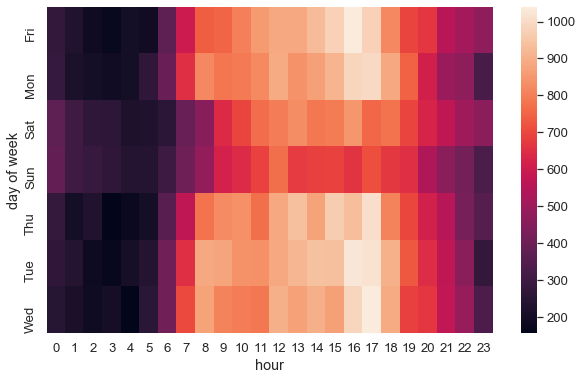

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df2)

<Figure size 720x432 with 0 Axes>

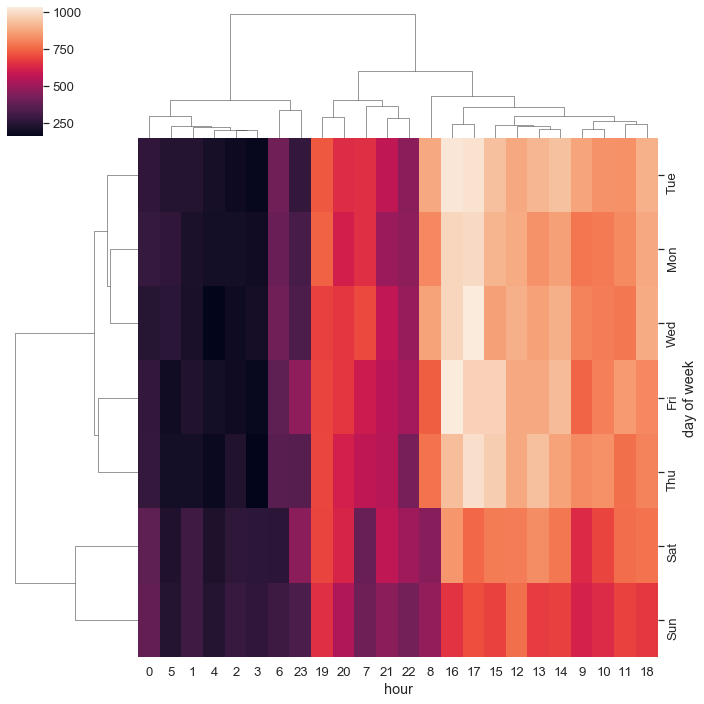

In [70]:
plt.figure(figsize=(10,6))
sns.clustermap(data=df2)

In [74]:
# Analysis by month/day of week
df3 = df.groupby(['month', 'day of week']).count()['twp'].unstack(level=0)
df3

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tue,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wed,1699,1902,1888,1517,1538,2054,1715,1295,1260


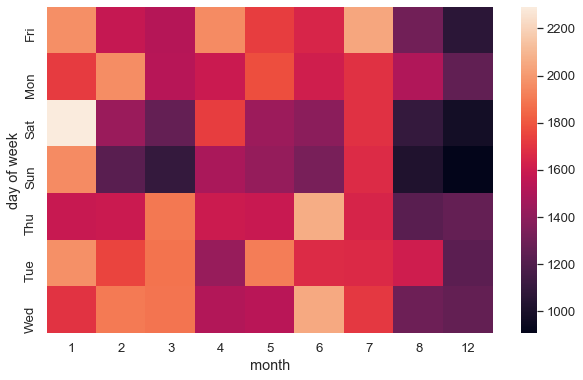

In [75]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df3)

<Figure size 720x432 with 0 Axes>

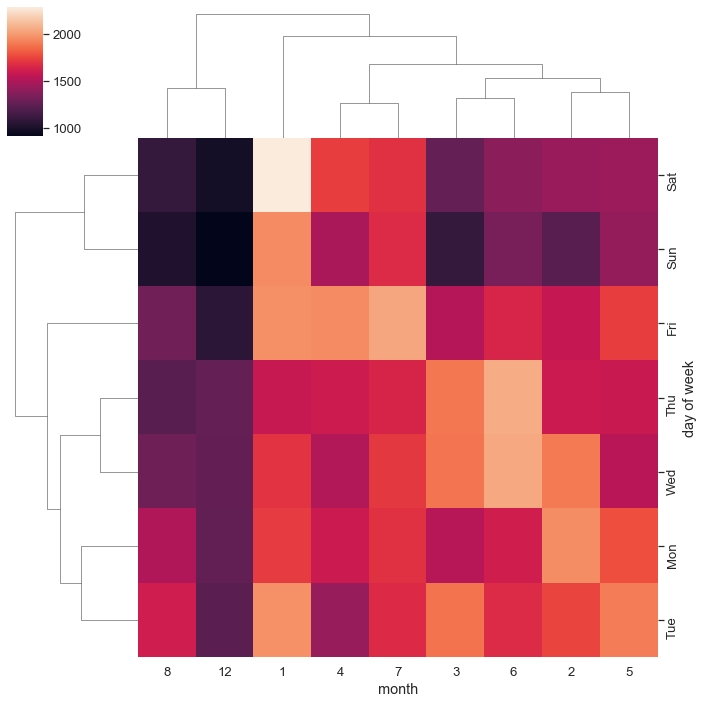

In [76]:
plt.figure(figsize=(10,6))
sns.clustermap(data=df3)